In [74]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
satisfaction_table = pd.read_csv('Survey data_Inflight Satisfaction Score.csv')

In [50]:
df = satisfaction_table[['flight_number', 'scheduled_departure_date', 'score', 'haul_type', 'media_provider','generation','cabin_code_desc']]

In [51]:
df.head()

,flight_number,scheduled_departure_date,score,haul_type,media_provider,generation,cabin_code_desc
0,3802,9/1/2022,2,Short,NaN,Gen X,Economy
1,4645,9/1/2022,5,Short,GOGO,Boomer,Business
2,5236,9/1/2022,5,Short,GOGO,Gen X,Business
3,4686,9/1/2022,3,Short,NaN,Boomer,Economy
4,671,9/1/2022,5,Short,PANASONIC,Boomer,Business


In [52]:
numeric_columns = ['score']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
numeric_df = df.dropna(subset=numeric_columns)

<ipython-input-52-3f4e7ad13709>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [53]:
numeric_df.head()

,flight_number,scheduled_departure_date,score,haul_type,media_provider,generation,cabin_code_desc
0,3802,9/1/2022,2.0,Short,NaN,Gen X,Economy
1,4645,9/1/2022,5.0,Short,GOGO,Boomer,Business
2,5236,9/1/2022,5.0,Short,GOGO,Gen X,Business
3,4686,9/1/2022,3.0,Short,NaN,Boomer,Economy
4,671,9/1/2022,5.0,Short,PANASONIC,Boomer,Business


In [54]:

flight_scores = numeric_df.groupby('flight_number')['score'].sum().reset_index()

In [55]:
merged_df = numeric_df.merge(flight_scores, on='flight_number', how='left', suffixes=('', '_agg'))


In [56]:
merged_df

,flight_number,scheduled_departure_date,score,haul_type,media_provider,generation,cabin_code_desc,score_agg
0,3802,9/1/2022,2.0,Short,NaN,Gen X,Economy,5.0
1,4645,9/1/2022,5.0,Short,GOGO,Boomer,Business,14.0
2,5236,9/1/2022,5.0,Short,GOGO,Gen X,Business,16.0
3,4686,9/1/2022,3.0,Short,NaN,Boomer,Economy,6.0
4,671,9/1/2022,5.0,Short,PANASONIC,Boomer,Business,22.0
...,...,...,...,...,...,...,...,...
34958,189,9/30/2022,4.0,Long,PANASONIC,Gen X,Economy,138.0
34959,188,9/30/2022,3.0,Long,PANASONIC,Gen X,Economy,164.0
34960,2,9/30/2022,4.0,Long,PANASONIC,Boomer,Economy,127.0
34961,2,9/30/2022,4.0,Long,PANASONIC,Gen X,Economy,127.0


In [57]:
merged_df.head()

,flight_number,scheduled_departure_date,score,haul_type,media_provider,generation,cabin_code_desc,score_agg
0,3802,9/1/2022,2.0,Short,NaN,Gen X,Economy,5.0
1,4645,9/1/2022,5.0,Short,GOGO,Boomer,Business,14.0
2,5236,9/1/2022,5.0,Short,GOGO,Gen X,Business,16.0
3,4686,9/1/2022,3.0,Short,NaN,Boomer,Economy,6.0
4,671,9/1/2022,5.0,Short,PANASONIC,Boomer,Business,22.0


In [58]:
media_provider_scores = merged_df.groupby('media_provider')['score'].sum().reset_index()

In [59]:
ranked_media_providers = media_provider_scores.sort_values(by='score', ascending=False)

In [72]:
ranked_media_providers.reset_index()

,index,media_provider,score
0,1,PANASONIC,46543.0
1,2,THALES,29838.0
2,0,GOGO,10329.0
3,3,VIASAT,9126.0


In [61]:
haul_scores = merged_df.groupby('haul_type')['score'].sum().reset_index()

In [62]:
ranked_haul_scores = haul_scores.sort_values(by='score', ascending=False)

In [70]:
ranked_haul_scores.reset_index()

,index,haul_type,score
0,1,Medium,62252.0
1,0,Long,26161.0
2,2,Short,12143.0


In [64]:
generation_scores = merged_df.groupby('generation')['score'].sum().reset_index()

In [65]:
ranked_generation_scores = generation_scores.sort_values(by='score', ascending=False)

In [71]:
ranked_generation_scores.reset_index()

,index,generation,score
0,0,Boomer,47338.0
1,1,Gen X,31830.0
2,4,Millennial,13944.0
3,6,Silent,4945.0
4,2,Gen Z,2489.0
5,5,NBK,8.0
6,3,Greatest,2.0


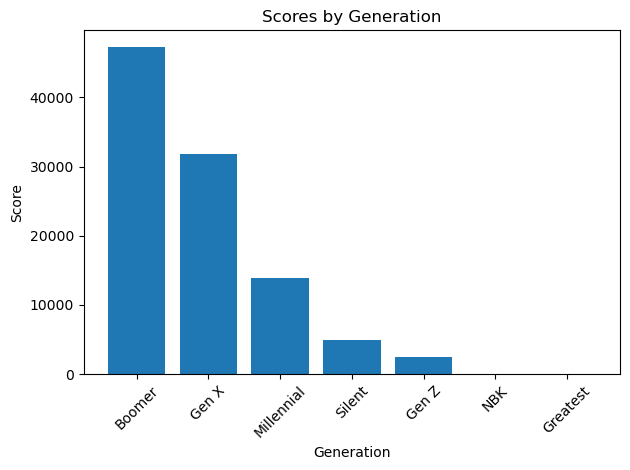

In [76]:
plt.bar(ranked_generation_scores['generation'], ranked_generation_scores['score'])
plt.xlabel('Generation')
plt.ylabel('Score')
plt.title('Scores by Generation')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

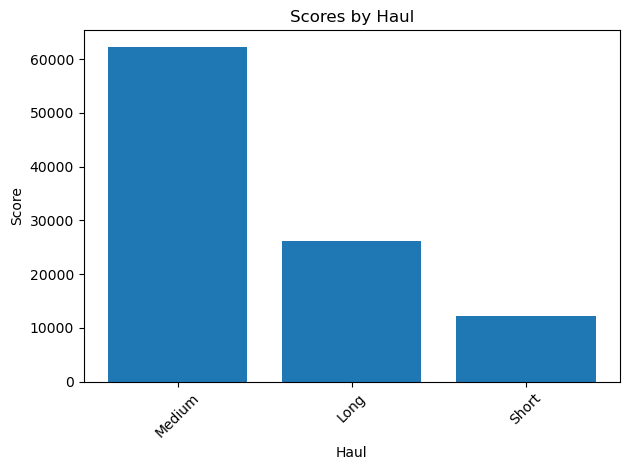

In [77]:
plt.bar(ranked_haul_scores['haul_type'], ranked_haul_scores['score'])
plt.xlabel('Haul')
plt.ylabel('Score')
plt.title('Scores by Haul')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

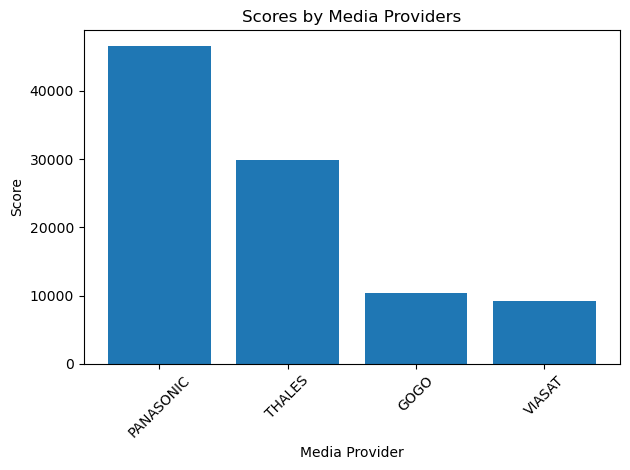

In [78]:
plt.bar(ranked_media_providers['media_provider'], ranked_media_providers['score'])
plt.xlabel('Media Provider')
plt.ylabel('Score')
plt.title('Scores by Media Providers')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()